In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from skimage import io
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [105]:
#read in the image
image = io.imread('car.jpg')
print(f"Image is of type: {type(image)}\n\nThis image has a shape: {image.shape}")

Image is of type: <class 'numpy.ndarray'>

This image has a shape: (168, 300, 3)


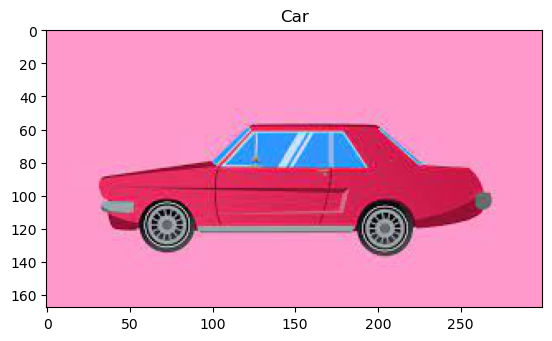

In [106]:
plt.imshow(image)
plt.title('Car')
plt.show()

In [107]:
img_normalized = image /255
# Reshape the image so that the RGB channels are in 3 columns
pixels_per_channel = image.shape[0] * image.shape[1]
reshaped_image = img_normalized.reshape(pixels_per_channel,3)

In [108]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(reshaped_image)
print(f"These are the cluster number each data point belongs to:\n\n{kmeans.labels_}")

/Users/greg/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


These are the cluster number each data point belongs to:

[1 1 1 ... 1 1 1]


In [109]:
segmented_image = kmeans.labels_.reshape(image.shape[:2])

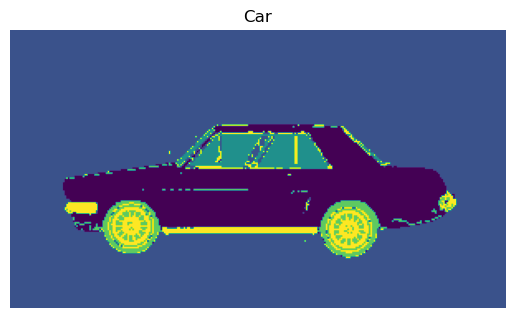

In [110]:
plt.imshow(segmented_image)
plt.axis('off')
plt.title('Car')
plt.show()

In the original picture the car is displayed using a bunch of different colors but in the segmented image there are only two colors, one for the car and one for the background.

When I change the clusters to 5 I notice that the wheels, the bumper, the windows, the car, and the background all have their own color.

Image segmentation is so the computer can look at a picture and group similar colors together to try to figure out the difference between different objects and the background.

In [138]:
data = pd.read_csv('Concrete_Data.csv')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age_days,Concrete compressive strength_Mpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [139]:
feature_cols = list(data.columns[:-1])

X = data[feature_cols]
y = data['Concrete compressive strength_Mpa']


In [208]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

print(f"Scaled DataFrame:\n\n{X_train_scaled}")

Scaled DataFrame:

     Cement (component 1)(kg in a m^3 mixture)  \
995                                  -1.173397   
507                                   1.367395   
334                                  -0.058090   
848                                  -0.279237   
294                                  -1.074790   
..                                         ...   
87                                    0.049132   
330                                  -0.329019   
466                                  -0.869918   
121                                   1.855641   
860                                   0.314317   

     Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
995                                           0.869740       
507                                          -0.601778       
334                                          -0.856888       
848                                           0.267913       
294                                          -0.367541       
..      

In [209]:
linreg = LinearRegression()  # If you look at the guide, there are many arguments you can feed but we shall stick to the basic algorithm with defaults

# We can now use the training data to train or fit a model and it is as simple as:

linreg.fit(X_train_scaled,y_train)

# Let us use the model we have built to predict y_train from X_train
y_train_pred = linreg.predict(X_train_scaled)
y_pred = linreg.predict(X_test_scaled)

In [210]:
print(f"Root Means Sqaure Error of our model is: {np.sqrt(mean_squared_error(y_train_pred,y_train))}")
print(f"Root Mean Square Error on test data: {np.sqrt(mean_squared_error(y_pred,y_test))}")

Root Means Sqaure Error of our model is: 10.518787334819802
Root Mean Square Error on test data: 9.796475901624362


In [211]:
pca = PCA(n_components=7,random_state=42)
principalComponents = pca.fit_transform(X_scaled)
print(principalComponents.shape)

(1030, 7)


In [212]:
pca_all = PCA(n_components=8,random_state=42)

# Let us fit transform the original scaled data
principalComponents_all = pca_all.fit_transform(X_scaled)

# The explained variance is accessible as a method from the PCA object we created
print(f"Explained variance ratios:\n{pca_all.explained_variance_ratio_}")

Explained variance ratios:
[0.28501242 0.17700935 0.16750988 0.12676986 0.1189385  0.09877443
 0.02223021 0.00375535]


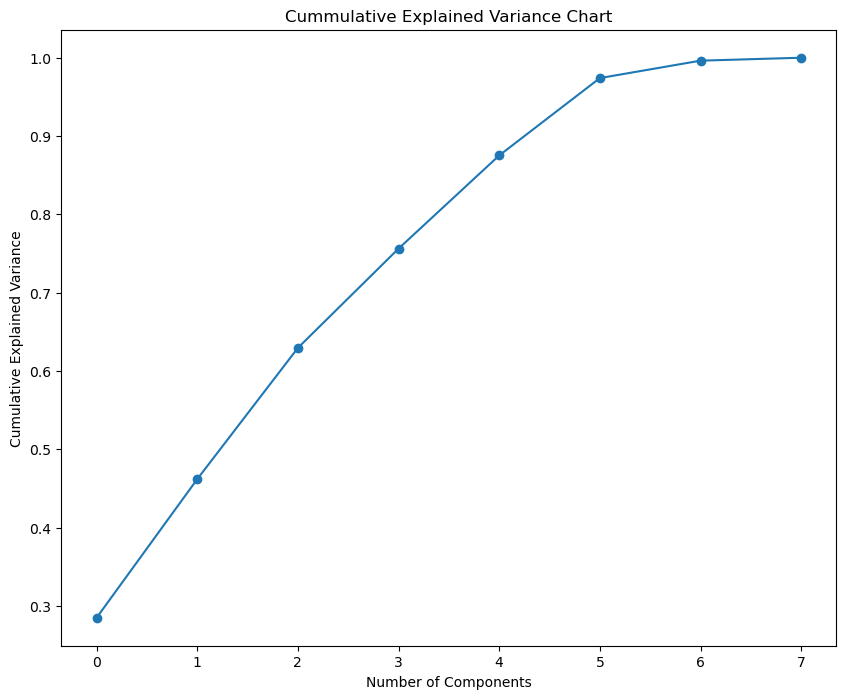

In [213]:
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), marker='o')
plt.title('Cummulative Explained Variance Chart')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()# Check how many components are enough for explaining 90% variance

In [238]:
pca90 = PCA(n_components=6,random_state=42)
principalComponents90 = pca90.fit_transform(X_scaled)
principalComponents90_test = pca90.fit_transform(X_test_scaled)
principalComponents90_train = pca90.fit_transform(X_train_scaled)
print(principalComponents90.shape)

(1030, 6)


In [239]:
linreg = LinearRegression()  # If you look at the guide, there are many arguments you can feed but we shall stick to the basic algorithm with defaults

# We can now use the training data to train or fit a model and it is as simple as:

linreg.fit(principalComponents90_train,y_train)

# Let us use the model we have built to predict y_train from X_train
y_train_pred = linreg.predict(principalComponents90_train)
y_pred = linreg.predict(principalComponents90_test)
print(f"Root Means Sqaure Error of our model is: {np.sqrt(mean_squared_error(y_train_pred,y_train))}")
print(f"Root Mean Square Error on test data: {np.sqrt(mean_squared_error(y_pred,y_test))}")

Root Means Sqaure Error of our model is: 11.157884920530242
Root Mean Square Error on test data: 12.379403075827184


The Root Means Sqaure Error of the model done without pca is 10.518787334819802 and 11.157884920530242 for the model done with pca. 10% of 10.518787334819802 is around 1.05 and 10.518787334819802 plus 1.05 is around 11.56 so the model done with is within the 10% range

If the model with PCA is within the 10% range of the model without PCA, it suggests that the reduction in the number of components using PCA did not significantly impact the overall performance of the model while using less computing power.

In [258]:
Synthetic_responses = [
"I love the sleek design of the car.",
"The car has excellent fuel efficiency.",
"The safety features in the car are top-notch.",
"The car's performance on the road is outstanding.",
"The interior of the car is spacious and comfortable.",
"I'm impressed with the advanced technology features in the car.",
"The car offers great value for the price.",
"The handling and maneuverability of the car are superb.",
"The car's infotainment system is user-friendly and intuitive.",
"I appreciate the ample storage space in the car.",
"The car's acceleration is impressive.",
"The sound system in the car provides excellent audio quality.",
"The car's exterior design is eye-catching.",
"I find the car to be reliable and dependable.",
"The car offers a smooth and comfortable ride.",
"The car's braking system is efficient and responsive.",
"The car's suspension provides a comfortable driving experience.",
"I like the variety of color options available for the car.",
"The car's maintenance costs are reasonable.",
"The car's warranty coverage is comprehensive.",
"The car's headlights offer excellent visibility at night.",
"The car's seats are ergonomic and supportive.",
"The car's handling in different weather conditions is impressive.",
"The car's fuel economy exceeds my expectations.",
"The car's safety ratings are reassuring.",
"The car's technology integration with smartphones is seamless.",
"I appreciate the car's spacious trunk capacity.",
"The car's design reflects a modern and stylish look.",
"The car's navigation system is accurate and reliable.",
"The car's interior materials are of high quality.",
"The car's climate control system provides optimal comfort.",
"The car's engine power is impressive.",
"I enjoy the panoramic sunroof in the car.",
"The car's audio system offers immersive sound quality.",
"The car's exterior color options are appealing.",
"The car's transmission provides smooth gear shifts.",
"The car's fuel efficiency allows for long drives without frequent refueling.",
"The car's resale value is competitive.",
"The car's seat comfort makes long trips enjoyable.",
"The car's entertainment options cater to all passengers.",
"The car's build quality feels sturdy and durable.",
"The car's technology features enhance the driving experience.",
"The car's suspension absorbs road bumps effectively.",
"The car's interior lighting creates a pleasant ambiance.",
"The car's handling in tight spaces is effortless.",
"I appreciate the car's safety assist features, such as blind-spot monitoring and lane-keeping assist.",
"The car's fuel tank capacity allows for extended driving range.",
"The car's acceleration from 0 to 60 mph is impressive.",
"The car's seating configuration offers flexibility for passengers and cargo.",
"The car's exterior design stands out from other vehicles on the road.",
"The car's engine noise is minimal during acceleration.",
"The car's parking assist system makes parking hassle-free.",
"The car's dashboard layout is intuitive and easy to navigate.",
"The car's high-quality materials give it a luxurious feel.",
"The car's safety features provide peace of mind.",
"The car's suspension system offers a smooth and comfortable ride.",
"I appreciate the car's fuel-saving start-stop feature.",
"The car's responsive steering enhances the driving experience.",
"The car's smartphone integration allows for seamless connectivity.",
"The car's seating configuration offers no flexibility for passengers and cargo.",
"The car's exterior design is old fashioned and boring.",
"The car's engine noise is horrible during acceleration.",
"The car's parking assist system is complicated",
"The car's dashboard layout is not intuitive and difficult to navigate.",
"The car's high-quality materials make it very expensive.",
"The car's safety features creates many doubts.",
"The car's suspension system offers is not smooth.",
"I appreciate the car's fuel-saving start-stop feature but it is irritating.",
"The car's steering is not responsive.",
"The car's smartphone integration works erratically."]

resp = ["The car is horrible",'The car smartphone integration works poorly',"The car is excellent","the car is ordinary"]

In [275]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# instantiate an object
sid = SentimentIntensityAnalyzer()

In [276]:
score = [] # Empty list to store sentiment values

# Compute positive, neutral, negative and compund score for a review using the "polarity_scores" function
for r in Synthetic_responses:
        score.append(sid.polarity_scores(r))
        print(sid.polarity_scores(r))

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'compound': 0.7351}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.6124}
{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compound': 0.7579}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.6486}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compo

In [277]:
stop_words = set(stopwords.words('english'))

# Remove stop words from the responses
clean_responses = []
for response in Synthetic_responses:
    tokens = word_tokenize(response)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    clean_response = ' '.join(filtered_tokens)
    clean_responses.append(clean_response)

positive_scores = [scores['pos'] for scores in score]
negative_scores = [scores['neg'] for scores in score]
neutral_scores = [scores['neu'] for scores in score]
compound_scores = [scores['compound'] for scores in score]
lowercase_responses = [response.lower() for response in clean_responses]

# Create the DataFrame
data = {
    "Response": lowercase_responses,  # List of responses
    "Positive": positive_scores,
    "Negative": negative_scores,
    "Neutral": neutral_scores,
    "Compound": compound_scores
}

df = pd.DataFrame(data)
df.head()

,Response,Positive,Negative,Neutral,Compound
0,love sleek design car .,0.412,0.0,0.588,0.6369
1,car excellent fuel efficiency .,0.608,0.0,0.392,0.7351
2,safety features car top-notch .,0.286,0.0,0.714,0.4215
3,car 's performance road outstanding .,0.364,0.0,0.636,0.6124
4,interior car spacious comfortable .,0.292,0.0,0.708,0.5106


In [278]:
df['Sentiment'] = df['Compound'].apply(lambda l: 'positive' if l > 0.5 else 'negative' if l < 0.25 else 'neutral')
df.tail()

,Response,Positive,Negative,Neutral,Compound,Sentiment
65,car 's safety features creates many doubts .,0.441,0.198,0.360,0.4019,neutral
66,car 's suspension system offers smooth .,0.000,0.000,1.000,0.0000,negative
67,appreciate car 's fuel-saving start-stop featu...,0.134,0.289,0.578,-0.4854,negative
68,car 's steering responsive .,0.000,0.297,0.703,-0.2755,negative
69,car 's smartphone integration works erratically .,0.000,0.000,1.000,0.0000,negative


In [279]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cvectorizer = CountVectorizer()
X = cvectorizer.fit_transform(df['Response'])
y = df['Sentiment']
X = X.toarray()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [280]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [281]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

gnb = GaussianNB()
gnb.fit(X_train_balanced, y_train_balanced)
y_train_pred = gnb.predict(X_train_balanced)
y_test_pred = gnb.predict(X_test)
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
confusion_mat = confusion_matrix(y_train_balanced, y_train_pred)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

Training Accuracy: 0.8533333333333334
Test Accuracy: 0.5
Confusion Matrix:
[[22  2  1]
 [ 0 17  8]
 [ 0  0 25]]


In [282]:
vectorizer = TfidfVectorizer() # Instantiate the object from the class
X1 = vectorizer.fit_transform(df['Response'])
y1 = df['Sentiment']
X1 = X1.toarray()
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [286]:
gnb1 = GaussianNB()
gnb1.fit(X_train_balanced, y_train_balanced)
y_train_pred = gnb.predict(X_train_balanced)
y_test_pred = gnb.predict(X_test)
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
confusion_mat = confusion_matrix(y_train_balanced, y_train_pred)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

Training Accuracy: 0.96
Test Accuracy: 0.42857142857142855
Confusion Matrix:
[[22  2  1]
 [ 0 25  0]
 [ 0  0 25]]


In [287]:
lowercase_list = [string.lower() for string in resp]

# Remove stopwords from the list of strings
cleaned_list = []
for string in lowercase_list:
    tokens = word_tokenize(string)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    cleaned_string = ' '.join(filtered_tokens)
    cleaned_list.append(cleaned_string)
print(cleaned_list)

['car horrible', 'car smartphone integration works poorly', 'car excellent', 'car ordinary']


In [289]:
transformed_data_count = cvectorizer.transform(cleaned_list).toarray()

# Transform the new data using the TF-IDF vectorizer
transformed_data_tfidf = vectorizer.transform(cleaned_list).toarray()
predictions_count = gnb.predict(transformed_data_count)
predictions_tfidf = gnb1.predict(transformed_data_tfidf)

In [290]:
print("Count Vectorizer Predictions:", predictions_count)
print("TF-IDF Vectorizer Predictions:", predictions_tfidf)

Count Vectorizer Predictions: ['negative' 'negative' 'positive' 'positive']
TF-IDF Vectorizer Predictions: ['negative' 'negative' 'positive' 'positive']


Both models predicted all of the new sentences correctly. In my opinion the count vectorizor preformed a little better. Even though it's model accuracy was worse than the tfidf it preformed better on the test data.

The count vectorizer model might be more suitable for the given dataset and the nature of the text responses. It creates a simple bag-of-words representation by counting the occurrence of each word, which may have captured relevant information in this specific context.

Ensuring consistent and effective preprocessing of the text data, including lowercase conversion, stop word removal, and handling special characters or noise in the responses.